In [1]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("Index_Crimes_by_County_and_Agency__Beginning_1990.csv")

In [3]:
# Clean column names (strip spaces)
df.columns = df.columns.str.strip()

In [4]:
print("First 5 rows of data:")
print(df.head())

First 5 rows of data:
   County          Agency  Year  Months Reported  Index Total  Violent Total  \
0  Albany  Albany City PD  1990              NaN         6635           1052   
1  Albany  Albany City PD  1991              NaN         7569           1201   
2  Albany  Albany City PD  1992              NaN         7791           1150   
3  Albany  Albany City PD  1993              NaN         7802           1238   
4  Albany  Albany City PD  1994              NaN         8648           1380   

   Murder  Rape  Robbery  Aggravated Assault  Property Total  Burglary  \
0       9    82      386                 575            5583      1884   
1      11    71      487                 632            6368      1988   
2       8    77      467                 598            6641      2246   
3       6    59      481                 692            6564      2063   
4      13    79      542                 746            7268      2227   

   Larceny  Motor Vehicle Theft             Region  

In [9]:
# Show basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 13459 entries, 12 to 23142
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   County               13459 non-null  object 
 1   Agency               13459 non-null  object 
 2   Year                 13459 non-null  int64  
 3   Months Reported      13459 non-null  float64
 4   Index Total          13459 non-null  int64  
 5   Violent Total        13459 non-null  int64  
 6   Murder               13459 non-null  int64  
 7   Rape                 13459 non-null  int64  
 8   Robbery              13459 non-null  int64  
 9   Aggravated Assault   13459 non-null  int64  
 10  Property Total       13459 non-null  int64  
 11  Burglary             13459 non-null  int64  
 12  Larceny              13459 non-null  int64  
 13  Motor Vehicle Theft  13459 non-null  int64  
 14  Region               13459 non-null  object 
dtypes: float64(1), int64(11), object(3)
memo

In [5]:
# Drop missing values 
df.dropna(inplace=True)

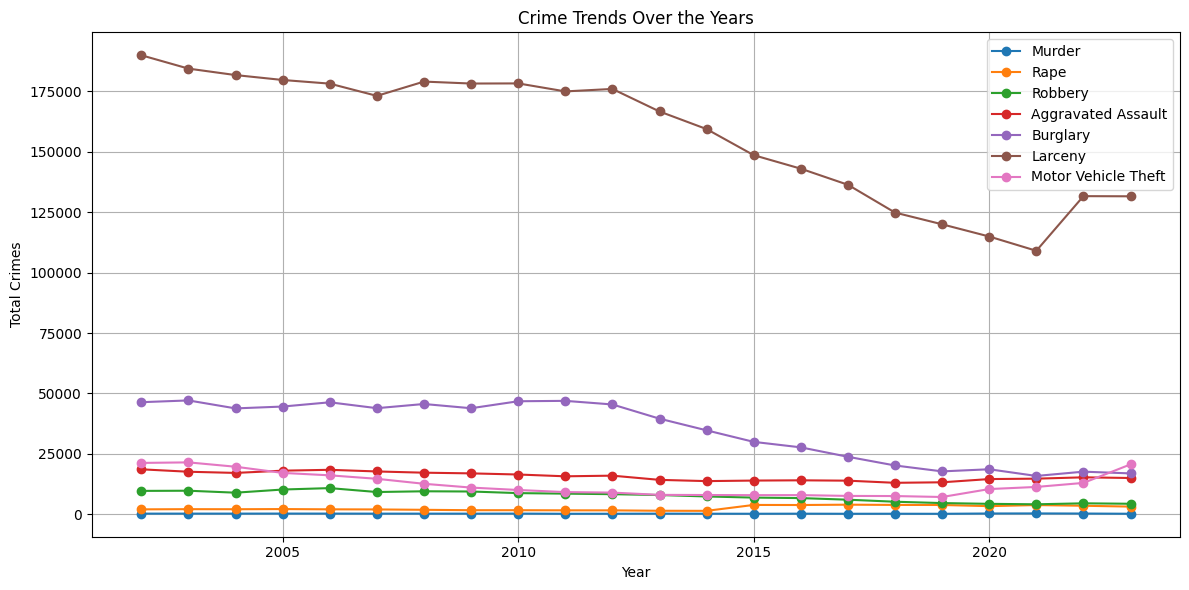

In [37]:
# Line plot of all crimes by year
plt.figure(figsize=(12, 6))

# Group total crimes by year
crime_trend = df.groupby('Year')[crime_cols].sum()

for crime in crime_cols:
    plt.plot(crime_trend.index, crime_trend[crime], marker='o', linestyle='-', label=crime)

plt.title("Crime Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Crimes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14880\2956721869.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_totals.index, y=crime_totals.values, palette="Set2")


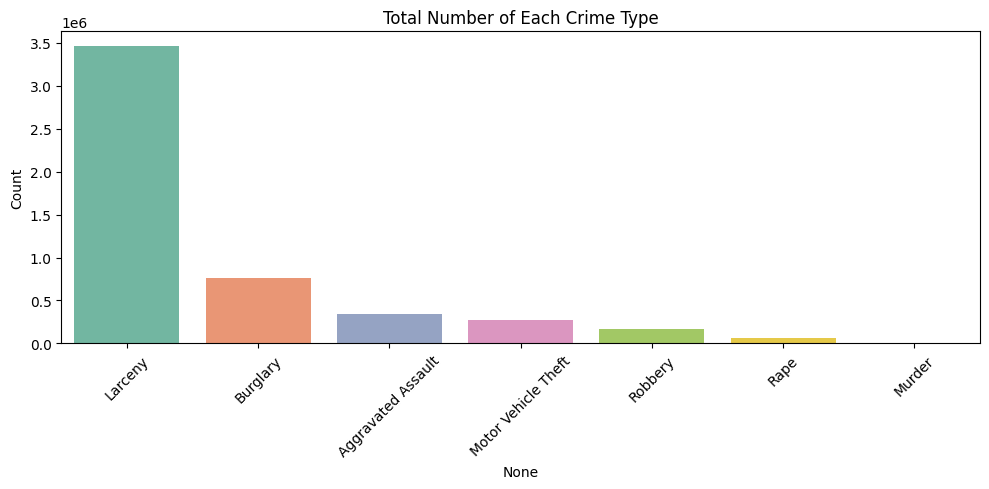

In [10]:
# Plot total number of each crime type (summed over all years/agencies)
crime_cols = ['Murder', 'Rape', 'Robbery', 'Aggravated Assault', 'Burglary', 'Larceny', 'Motor Vehicle Theft']
crime_totals = df[crime_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=crime_totals.index, y=crime_totals.values, palette="Set2")
plt.title("Total Number of Each Crime Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

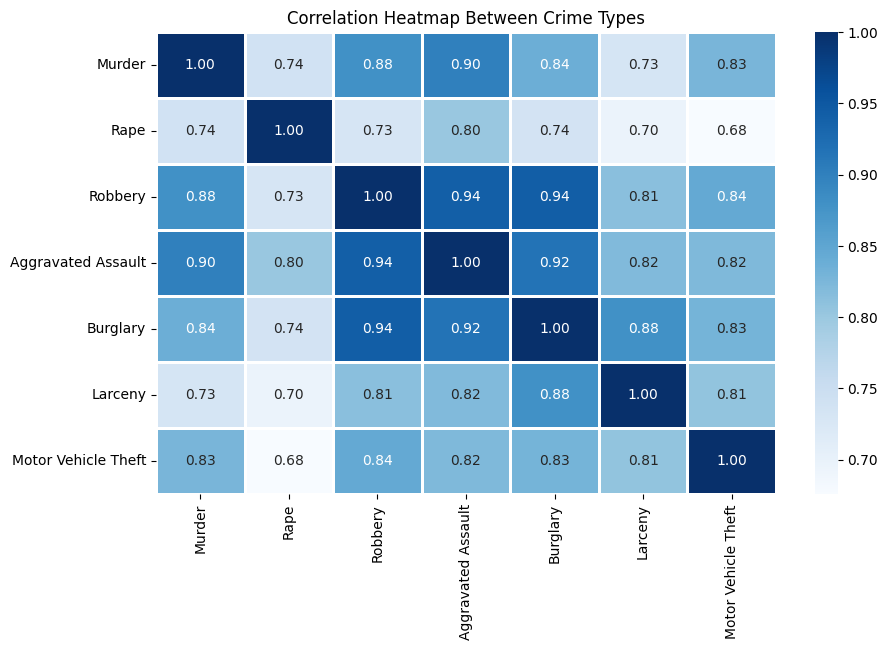

In [12]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[crime_cols].corr(), annot=True, cmap="Blues", fmt=".2f",linewidths=0.8)
plt.title("Correlation Heatmap Between Crime Types")
plt.show()

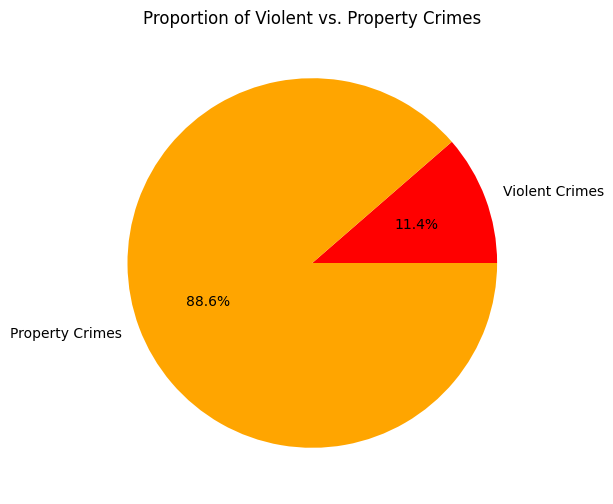

In [30]:
# Pie chart: Violent vs Property Crimes
violent_crimes = ['Murder', 'Rape', 'Robbery', 'Aggravated Assault']
property_crimes = ['Burglary', 'Larceny', 'Motor Vehicle Theft']

violent_total = df[violent_crimes].sum().sum()
property_total = df[property_crimes].sum().sum()

plt.figure(figsize=(6, 6))
plt.pie([violent_total, property_total], labels=["Violent Crimes", "Property Crimes"], autopct='%1.1f%%', colors=["red", "orange"])
plt.title("Proportion of Violent vs. Property Crimes")
plt.show()

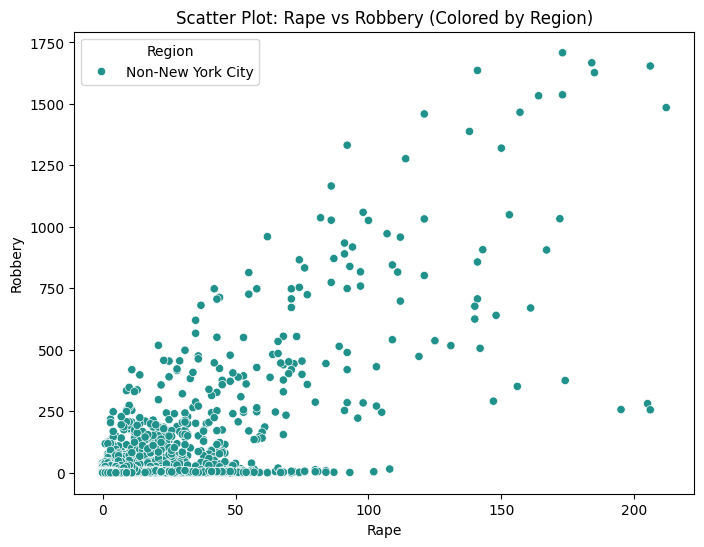

In [17]:
# Scatter plot (example: Rape vs Robbery)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Rape', y='Robbery', hue='Region', palette='viridis')
plt.title("Scatter Plot: Rape vs Robbery (Colored by Region)")
plt.xlabel("Rape")
plt.ylabel("Robbery")
plt.show()